In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
missing_values = ['-','/',' ','nan','nul','null','Nul','Null']
data = pd.read_csv('airline_passenger_satisfaction.csv')

In [3]:
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [4]:
df = data.copy()

In [5]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [6]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [7]:
features = ['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']

In [8]:
df['Total'] = df[features].sum(axis=1)

In [9]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Total
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,54
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,4,5,5,3,5,2,5,5,Satisfied,53
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,5,5,3,4,3,3,Satisfied,55
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,4,4,5,2,5,5,Satisfied,53
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,4,5,4,3,3,3,3,Satisfied,49


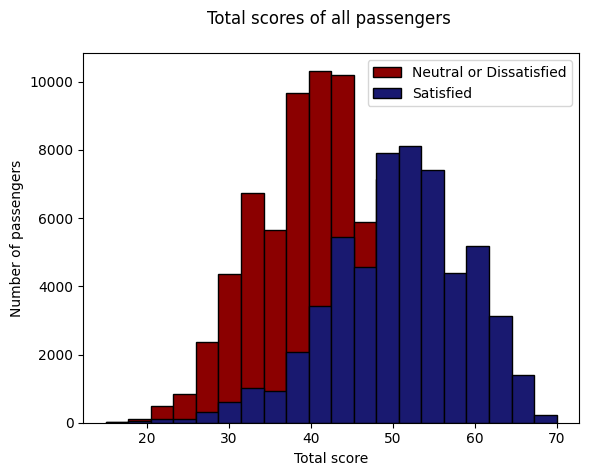

In [10]:
df.pivot(columns="Satisfaction", values="Total").plot.hist(bins=20,color=['Darkred','Midnightblue'],edgecolor='Black')
plt.title('Total scores of all passengers \n')
plt.xlabel('Total score')
plt.ylabel('Number of passengers')
plt.legend(title=False)
plt.grid(False)
plt.show()

In [11]:
satisfied = df.loc[df['Satisfaction'] == 'Satisfied']

In [12]:
satisfied.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Total
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,4,5,5,3,5,2,5,5,Satisfied,53
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,5,5,3,4,3,3,Satisfied,55
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,4,4,5,2,5,5,Satisfied,53
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,4,5,4,3,3,3,3,Satisfied,49
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,3,3,4,4,4,4,Satisfied,54


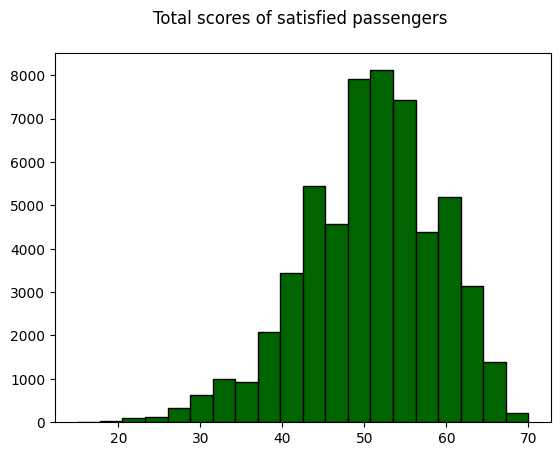

In [13]:
satisfied['Total'].hist(color='Darkgreen',bins=20,edgecolor='black')
plt.title('Total scores of satisfied passengers \n')
plt.grid(False)
plt.show()

In [14]:
dissatisfied = df.loc[df['Satisfaction'] == 'Neutral or Dissatisfied']

In [15]:
dissatisfied.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Total
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,54
8,9,Male,50,Returning,Business,Business,2607,0,0.0,1,...,3,4,3,3,4,4,4,4,Neutral or Dissatisfied,41
10,11,Female,28,First-time,Business,Business,821,0,5.0,1,...,2,5,2,2,4,1,2,3,Neutral or Dissatisfied,32
11,12,Female,27,First-time,Business,Business,421,20,21.0,2,...,2,5,1,1,3,1,1,4,Neutral or Dissatisfied,31
12,13,Male,24,First-time,Business,Economy,453,16,30.0,2,...,5,4,5,5,4,2,5,4,Neutral or Dissatisfied,48


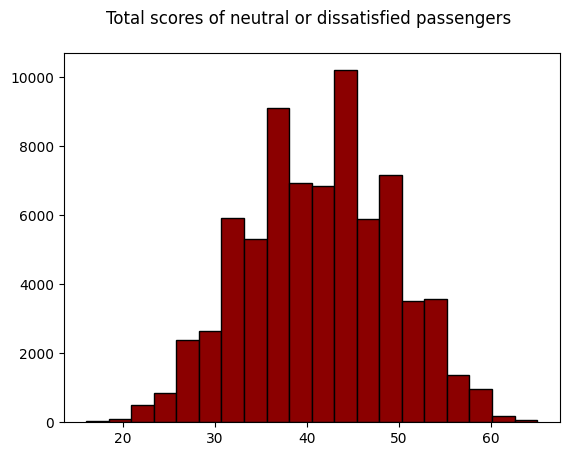

In [16]:
dissatisfied['Total'].hist(color='Darkred',bins=20,edgecolor='black')
plt.title('Total scores of neutral or dissatisfied passengers \n')
plt.grid(False)
plt.show()

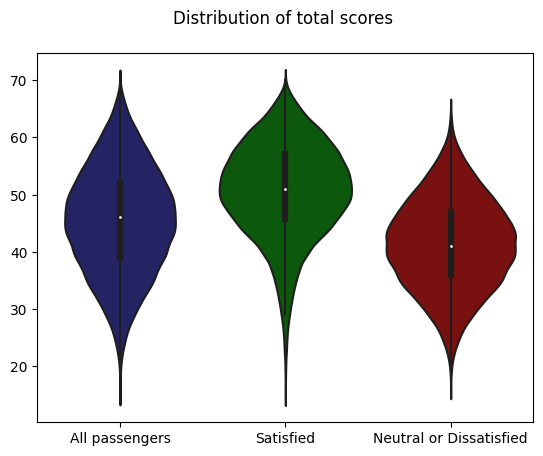

In [17]:
ax = sns.violinplot(data=[df.Total,satisfied.Total,dissatisfied.Total],palette=['Midnightblue','Darkgreen','Darkred'])
plt.title('Distribution of total scores \n')
ax.set_xticklabels(['All passengers', 'Satisfied', 'Neutral or Dissatisfied'])
plt.show()

In [18]:
features_total = features +['Total']

In [19]:
features_total

['Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling',
 'Total']

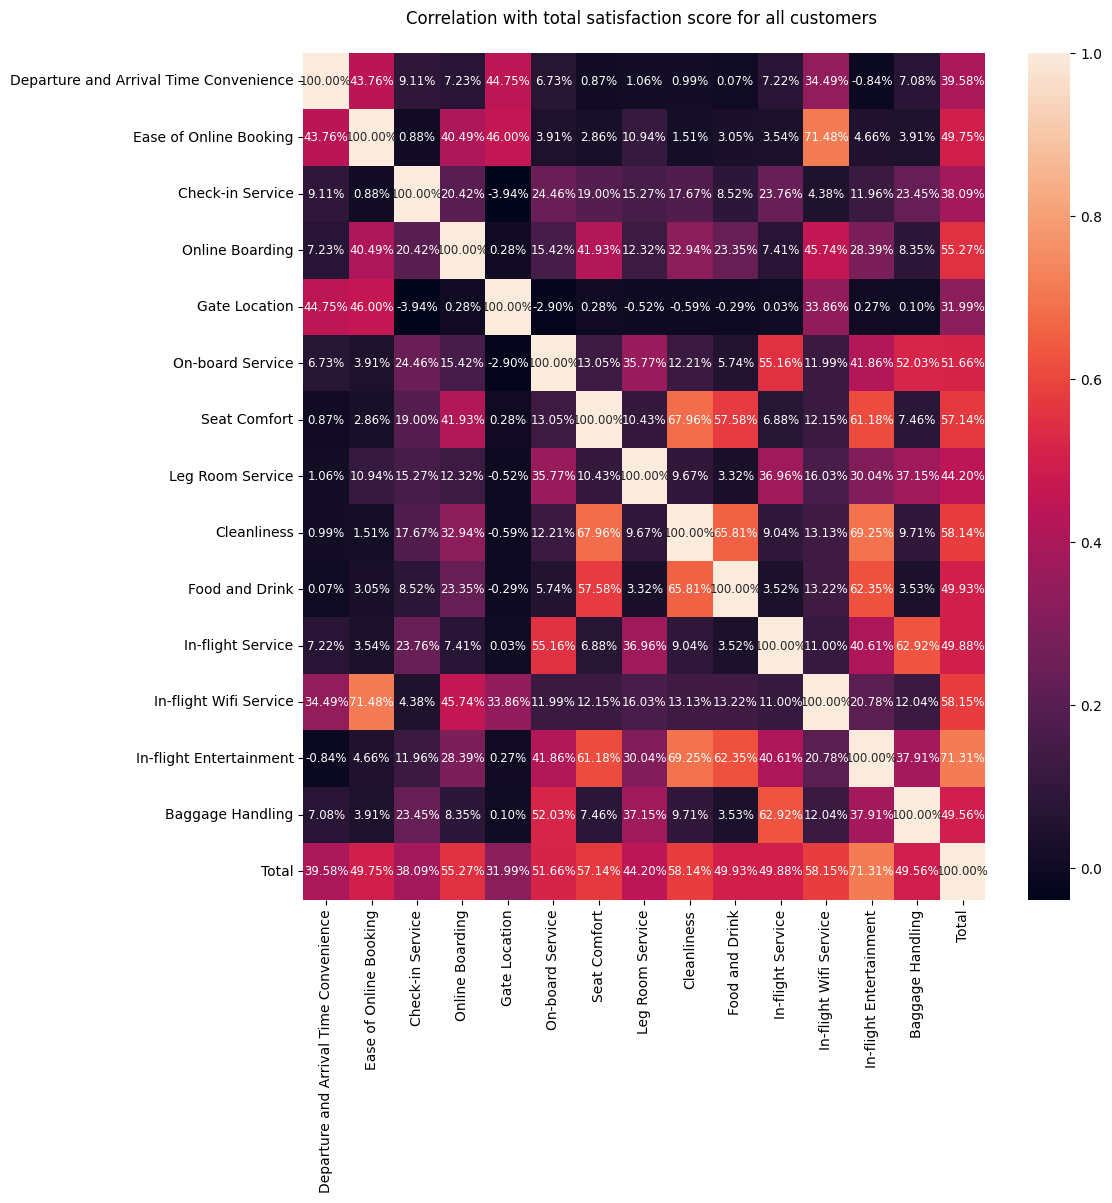

In [20]:
plt.figure(figsize=(11,11))
sns.heatmap(df[features_total].corr(),annot=True,annot_kws={"size": 8.5},fmt=".2%")
plt.title('Correlation with total satisfaction score for all customers \n')
plt.show()

In [21]:
corr_scores = df[features].corrwith(df.Total).sort_values()

In [22]:
corr_scores

Gate Location                             0.319905
Check-in Service                          0.380934
Departure and Arrival Time Convenience    0.395837
Leg Room Service                          0.442048
Baggage Handling                          0.495649
Ease of Online Booking                    0.497475
In-flight Service                         0.498802
Food and Drink                            0.499307
On-board Service                          0.516631
Online Boarding                           0.552707
Seat Comfort                              0.571413
Cleanliness                               0.581420
In-flight Wifi Service                    0.581466
In-flight Entertainment                   0.713132
dtype: float64

In [23]:
def plot_corr_scores(corr_scores, color, title):
    corr_scores = corr_scores
    width = np.arange(len(corr_scores))
    ticks = list(corr_scores.index)
    plt.barh(width, corr_scores, color=color)
    plt.yticks(width, ticks)
    plt.title('Correlation scores for ' + title + ' passengers \n')

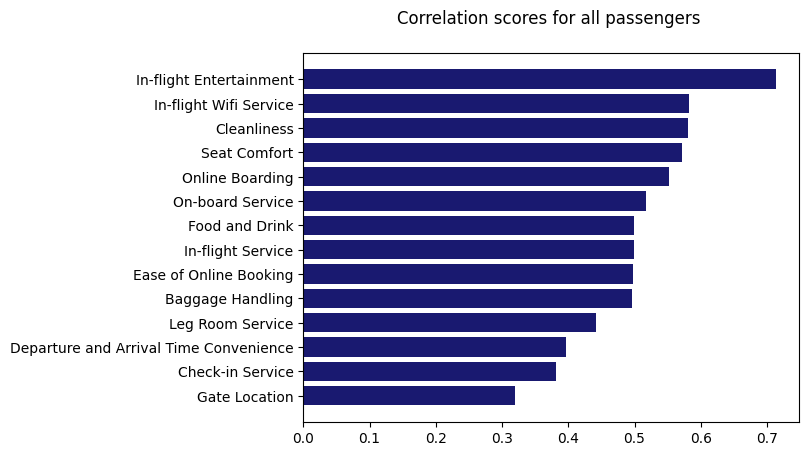

In [24]:
plot_corr_scores(corr_scores, 'midnightblue', 'all')

In [25]:
corr_scores_s = satisfied[features].corrwith(satisfied.Total).sort_values()

In [26]:
corr_scores_s

Check-in Service                          0.249379
Food and Drink                            0.327756
Cleanliness                               0.388700
Seat Comfort                              0.408836
Leg Room Service                          0.415826
On-board Service                          0.436634
Online Boarding                           0.436645
In-flight Service                         0.437546
Baggage Handling                          0.439007
Gate Location                             0.531694
Departure and Arrival Time Convenience    0.561830
In-flight Entertainment                   0.590813
In-flight Wifi Service                    0.605474
Ease of Online Booking                    0.616905
dtype: float64

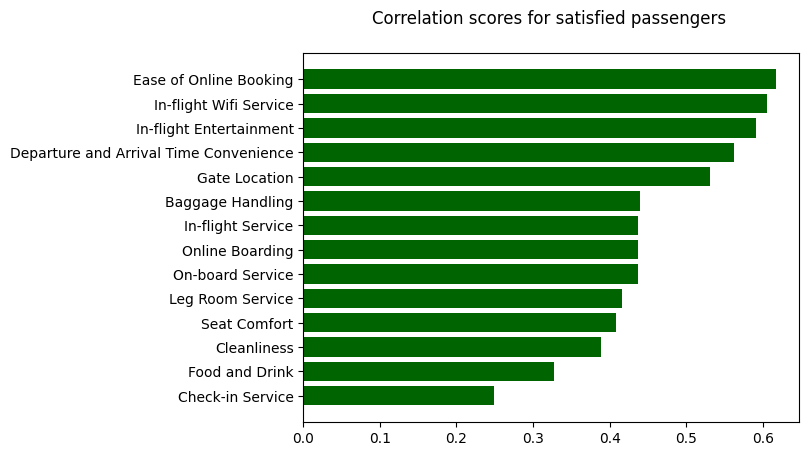

In [27]:
plot_corr_scores(corr_scores_s, 'darkgreen', 'satisfied')

In [28]:
corr_scores_d = dissatisfied[features].corrwith(dissatisfied.Total).sort_values(ascending=True)

In [29]:
corr_scores_d

Gate Location                             0.221680
Leg Room Service                          0.300719
Ease of Online Booking                    0.349358
Check-in Service                          0.359090
Online Boarding                           0.378134
Departure and Arrival Time Convenience    0.425314
On-board Service                          0.435073
Baggage Handling                          0.446588
In-flight Service                         0.457473
In-flight Wifi Service                    0.460219
Seat Comfort                              0.549644
Food and Drink                            0.567310
Cleanliness                               0.613714
In-flight Entertainment                   0.692390
dtype: float64

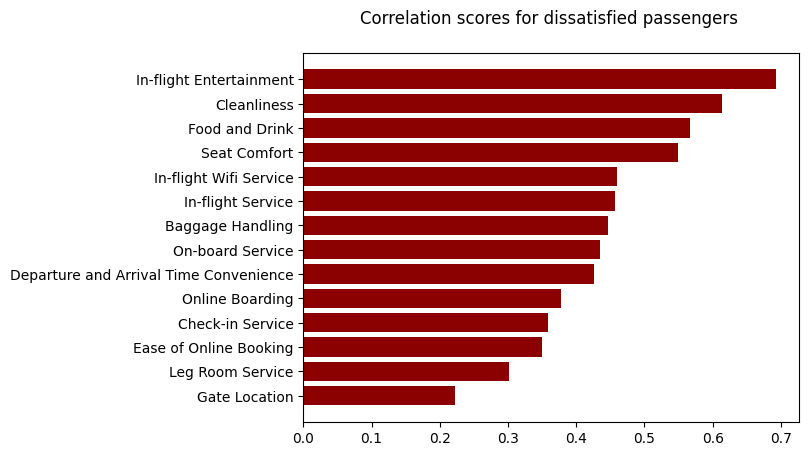

In [30]:
plot_corr_scores(corr_scores_d, 'darkred', 'dissatisfied')